In [1]:
import pandas as pd
housing=pd.read_csv('real_estate_price.csv')
housing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [2]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         499 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffa810d9d10>,
      dtype=object)

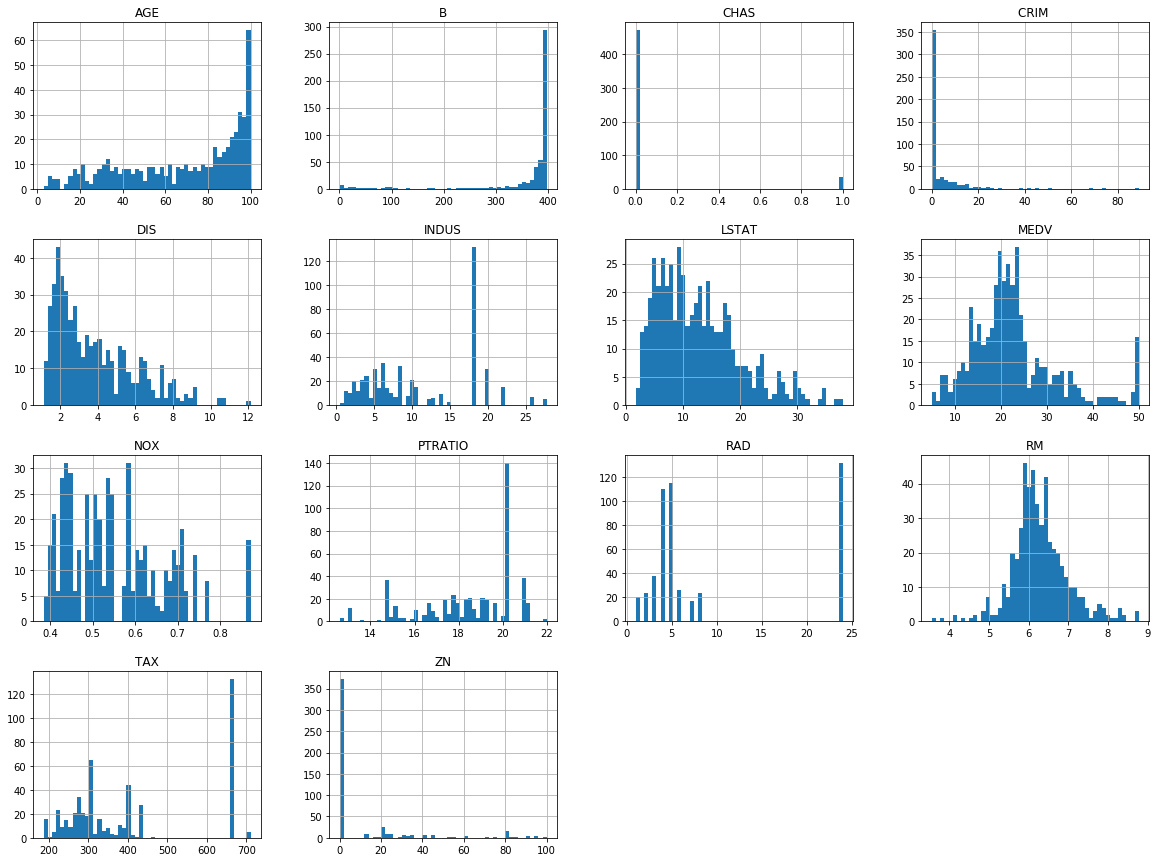

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50,figsize=(20,15))

# seperating training and testing data by self created function

In [5]:
# import numpy as np
# def split_train_test(data,test_ratio):
#     np.random.seed(42)
#     shuffle= np.random.permutation(len(data))
#     test_data_size=int(len(data)*test_ratio)
#     train_data=shuffle[test_data_size:]
#     test_data=shuffle[:test_data_size]
#     return data.iloc[train_data],data.iloc[test_data]

# Seperating training and testing data by importing library 

In [6]:
from sklearn.model_selection import train_test_split

train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42)

print(len(train_set))

404


# StratifiedShuffleSplit

In [7]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1 ,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing['CHAS']):
    strat_train_index=housing.loc[train_index]
    strat_test_index=housing.loc[test_index]

In [8]:
strat_train_index['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

# Looking For Corelation

In [9]:
corr_matrix=housing.corr()
corr_matrix['MEDV'].sort_values()

LSTAT     -0.737659
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
CRIM      -0.388305
RAD       -0.381626
AGE       -0.376955
CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
RM         0.694806
MEDV       1.000000
Name: MEDV, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffa7ccfe750>,
      dtype=object)

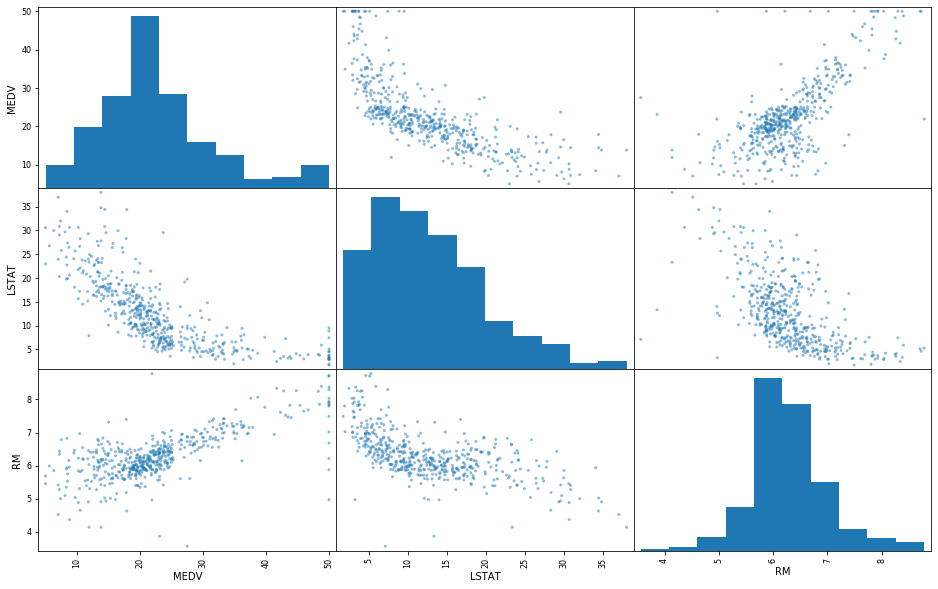

In [10]:
from pandas.plotting import scatter_matrix
attribute=["MEDV",'LSTAT','RM']
scatter_matrix(housing[attribute],figsize=(16,10))

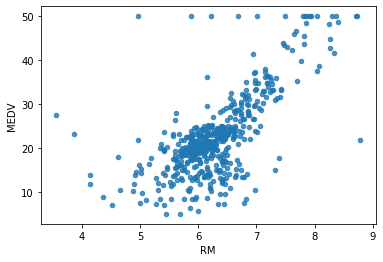

In [11]:
housing.plot(kind="scatter",x="RM",y="MEDV",alpha=0.8)

# Trying out Combination

In [12]:
housing['TAXRM']=housing['TAX']/housing['RM']

In [13]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,45.019011
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,37.688834
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,33.681280
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,31.723350
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,31.061984


In [14]:
corr_matrix=housing.corr()
corr_matrix['MEDV'].sort_values()

LSTAT     -0.737659
TAXRM     -0.538316
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
CRIM      -0.388305
RAD       -0.381626
AGE       -0.376955
CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
RM         0.694806
MEDV       1.000000
Name: MEDV, dtype: float64

In [15]:
housing=strat_train_index.drop("MEDV",axis=1)
housing_label=strat_train_index['MEDV']

# Missing Attributes

In [16]:
# To take care of missing attributes, you have three options:
#     1. Get rid of the missing data points
#     2. Get rid of the whole attribute
#     3. Set the value to some value(0, mean or median)

In [17]:
median=housing['RM'].median()

In [18]:
housing['RM'].fillna(median)

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [19]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,398.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.285286,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791535
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.716105,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235724
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.881000,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.217500,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.634000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [20]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='median')
imputer.fit(housing)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [21]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21750e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

# Sklearn Design

Primarily, three types of objects
1. Estimators - It estimates some parameter based on a dataset. Eg. imputer. It has a fit method and transform method. Fit method - Fits the dataset and calculates internal parameters

2. Transformers - transform method takes input and returns output based on the learnings from fit(). It also has a convenience function called fit_transform() which fits and then transforms.

3. Predictors - LinearRegression model is an example of predictor. fit() and predict() are two common functions. It also gives score() function which will evaluate the predictions.

# Feature Scaling

Primarily, two types of feature scaling methods:
1. Min-max scaling (Normalization)
    (value - min)/(max - min)
    Sklearn provides a class called MinMaxScaler for this
    
2. Standardization
    (value - mean)/std
    Sklearn provides a class called StandardScaler for this


In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('standard',StandardScaler())
])

In [23]:
housing_tr_num=my_pipeline.fit_transform(housing)

In [24]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [25]:
housing_num_tr.shape

(404, 13)

# selecting design for real estate

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model=LinearRegression()
# model=DecisionTreeRegressor()
model=RandomForestRegressor()
model.fit(housing_tr_num,housing_label)

/home/shivam/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [27]:
some_data=housing.iloc[:5]

In [28]:
some_label=housing_label.iloc[:5]

In [29]:
prepared_data=my_pipeline.transform(some_data)

In [30]:
model.predict(prepared_data)

array([22.06, 26.96, 15.81, 23.24, 23.01])

In [31]:
list(some_label)

[21.9, 24.5, 16.7, 23.1, 23.0]

# Evaluating the Error 

In [32]:
import numpy as np
from sklearn.metrics import mean_squared_error
data=model.predict(housing_tr_num)
mse=mean_squared_error(data,housing_label)
rmse=np.sqrt(mse)

In [33]:
rmse

1.7138852711813233

# Better Way of evaluating-Cross Validation

In [34]:
import numpy as np
from sklearn.model_selection import cross_val_score
score=cross_val_score(model,housing_num_tr,housing_label,scoring='neg_mean_squared_error',cv=10)
rmse=np.sqrt(-score)

In [35]:
rmse

array([2.79404332, 3.03010505, 4.4881133 , 2.51688687, 4.11282871,
       2.67328216, 5.40853816, 3.57501119, 3.71948686, 3.59723818])

In [36]:
def print_score(score):
    print("score ",score)
    print("Mean ",rmse.mean())
    print('Standard deviation ',rmse.std())

In [37]:
print_score(score)

score  [ -7.80667805  -9.18153659 -20.14316098  -6.33471951 -16.91536
  -7.1464375  -29.252285   -12.780705   -13.8345825  -12.9401225 ]
Mean  3.591553377954464
Standard deviation  0.8569148706254306


# Saving The Model

In [38]:
from joblib import dump,load
dump(model,'Dragon.joblib')

['Dragon.joblib']

## Testing the model on test data

In [39]:

X_test = strat_test_index.drop("MEDV", axis=1)
Y_test = strat_test_index["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
# print(final_predictions, list(Y_test))

In [40]:
print(final_rmse)

3.229687959188239
